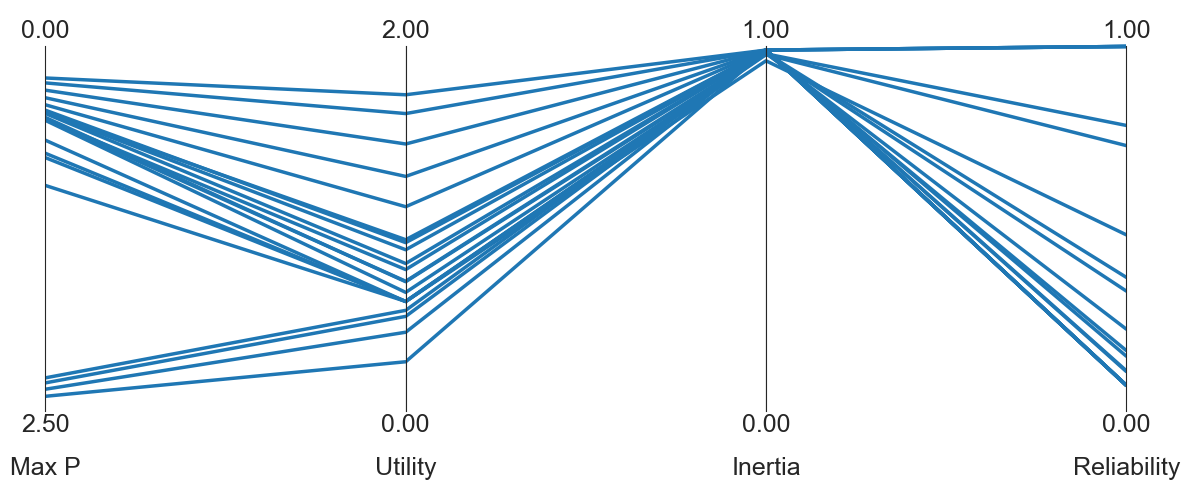

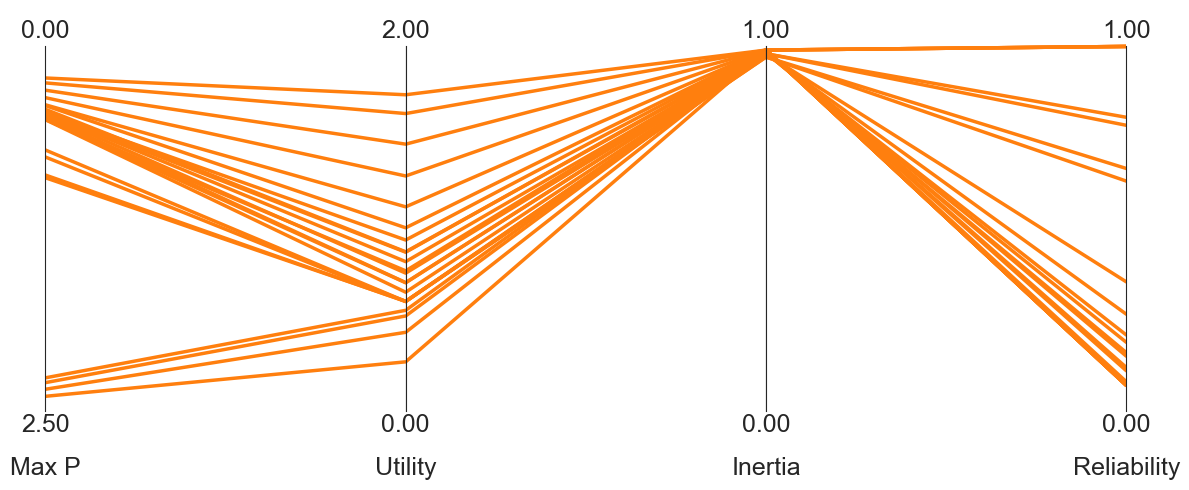

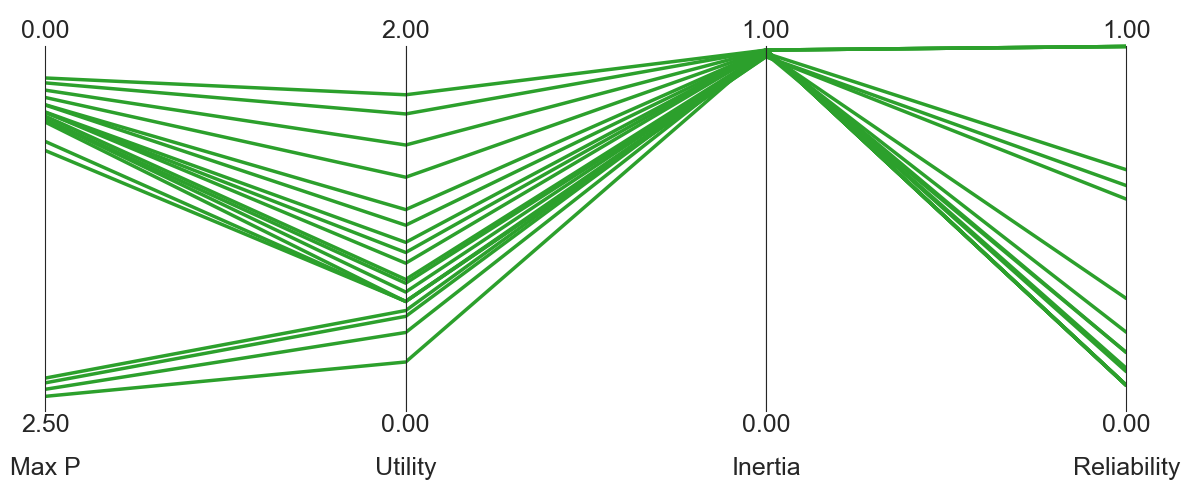

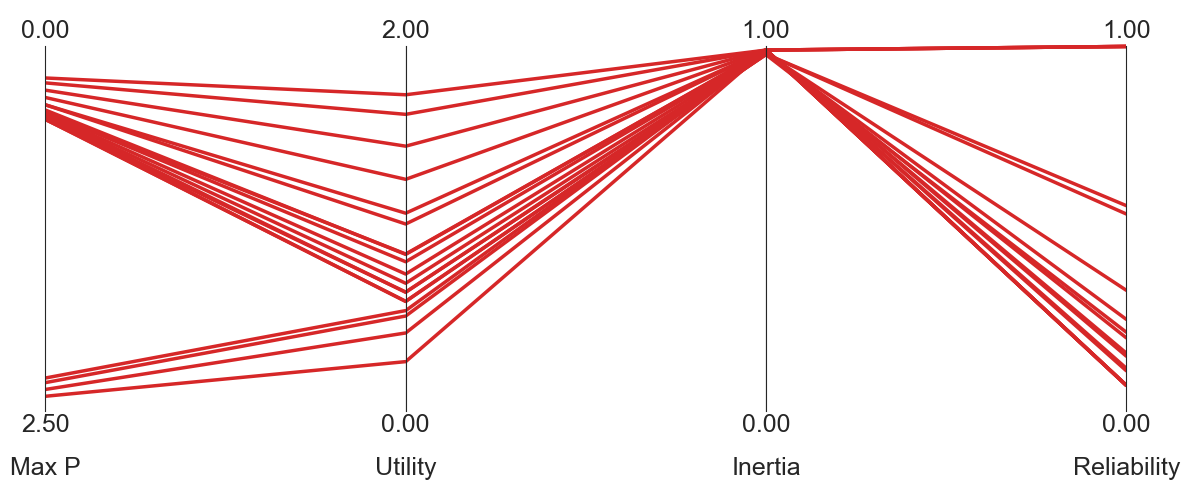

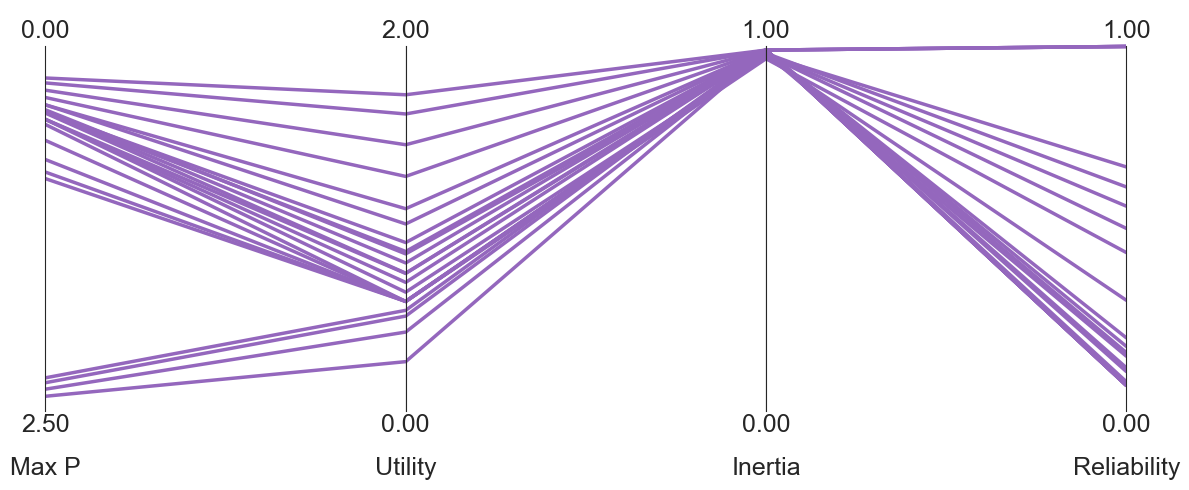

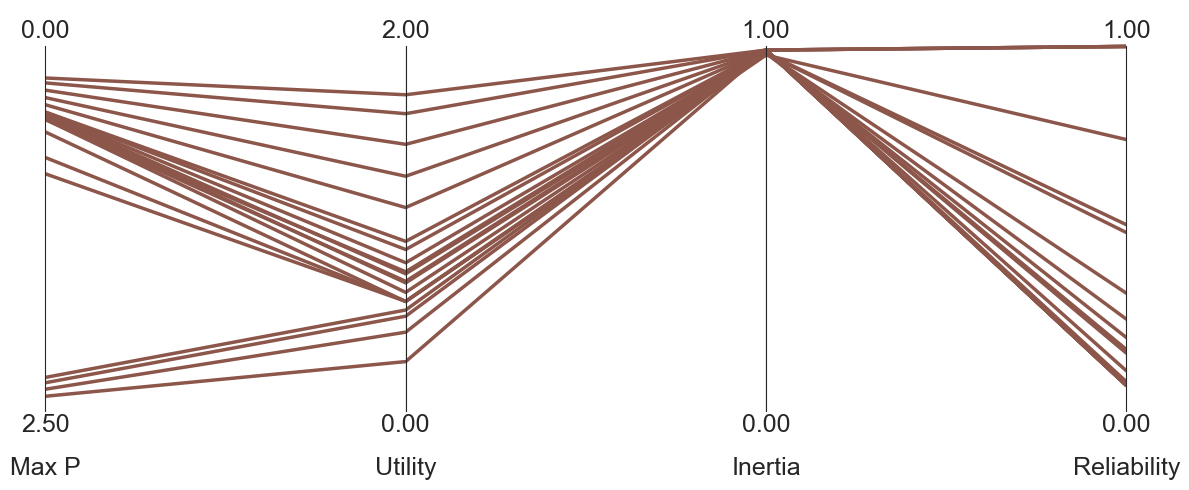

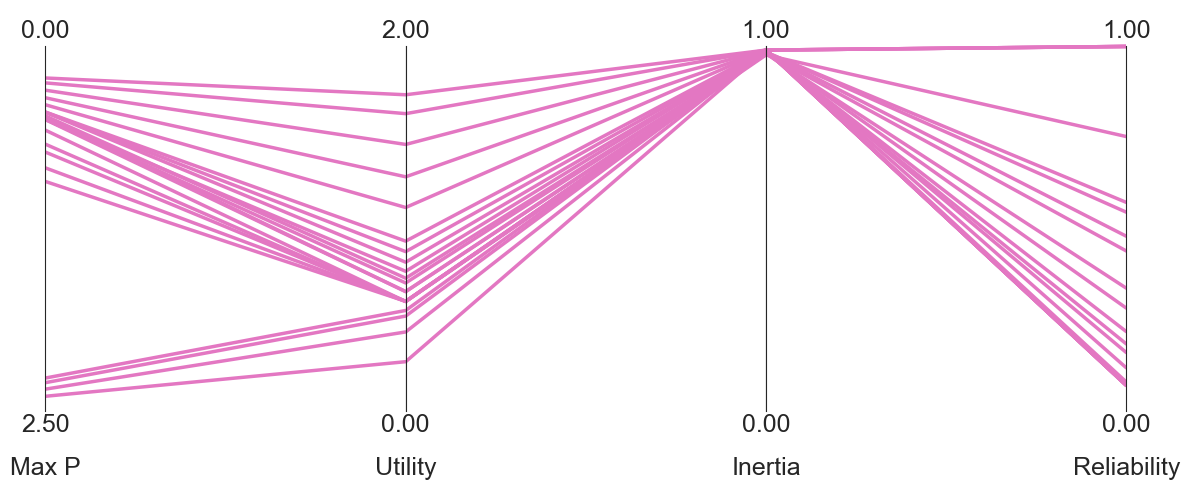

In [6]:
import sys
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import rbf_functions
import os
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = [12, 5]
sys.path.append("..")

rbfs = [
    rbf_functions.original_rbf,
    rbf_functions.squared_exponential_rbf,
    rbf_functions.inverse_quadratic_rbf,
    rbf_functions.inverse_multiquadric_rbf,
    rbf_functions.exponential_rbf,
    rbf_functions.matern32_rbf,
    rbf_functions.matern52_rbf,
]


pareto_sets = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = f"./refsets/"
    results = pd.read_csv(output_dir + name + "_refset.csv")
    results["max_p"] = 2.5 - results["max_p"]
    pareto_sets[name] = results

limits = get_limits(pd.concat(pareto_sets.values()))
limits.loc[0] = [0, 0, 0, 0]
limits.loc[1] = [2.5, 2, 1, 1]

# Modify the axis labels
labels = {
    "max_p": "Max P",
    "utility": "Utility",
    "inertia": "Inertia",
    "reliability": "Reliability"
}
# Renaming the limits columns as well
limits = limits.rename(columns=labels)

for (k, v), c in zip(pareto_sets.items(), sns.color_palette()):
    directory = os.path.join(f"../figs/{k}")
    if not os.path.exists(directory):
        os.mkdir(directory)

    # Modifying the names directly in the 0 DataFrame
    v = v.rename(columns=labels)

    axes = ParallelAxes(limits, fontsize=18, rot=0)
    axes.plot(v, label=k, lw=2.5, color=c, alpha=1)

    axes.invert_axis("Max P")
    plt.savefig(f"../figs/paper_figures/png/{k}_parcoords_LakeProblem.png")
    plt.savefig(f"../figs/paper_figures/pdf/{k}_parcoords_LakeProblem.pdf")

plt.show()
